### Before Starting
This is a tutorial that teaches basic aspects of the use of python's `twitter` package to extract and analyse tweets. In the tutorial we focus on the use of emojis. We will first describe how to extract data from the twitter API, then describe detection of emojis and lastly perform some preliminary analysis. 

If you have not already, from terminal, run `pip install twitter` to download python's twitter package.

In [30]:
%matplotlib inline
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import twitter

Now, log into your twitter account, head to https://dev.twitter.com/apps, and create a new app. This is required to gain API access on twitter. The $4$ blurred fields are required for the package to gain access to Twitter API ie: to make calls to the API. Be sure not to share your access keys with others as they are unique to your twitter account.
<img src="./twitter_settings.png" style="width: 600px;"/>
In the next cell, fill in the values corresponding to the blurred fields from your app. We can then begin accessing the API and running analysis through your app.

In [ ]:
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

# Create a connection to the api

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a 
# defined variable

print(twitter_api)

If the above outcome looks something like `<twitter.api.Twitter object at 0x1165df908>`, that means we have created a connection without error.

### Pulling Tweets using search
Now we can parse the results of a search query on twitter. In the string query, feel free to play around with the value. For the purpose of the tutorial, we have used '#nobanonwall'. If you do try to experiment, note that this function is valid only on terms that would be valid through twitter.com/search.

Make sure not to put too large a value for count. For values ~$100000$, the query could take very long to run. Here, we have kept it at $100$ and the cell should run in less than a second.

Run the cell below to understand the format of the results.

The result is a JSON (JavaScript Object Notation) object. You can think of it as a dictionary in python. `search_results` is a dictionary containing `statuses`, which is a list of dictionaries, each one corresponding to a different tweet containing the search term '#nobanonwall'.

In [ ]:
query = "#nobannowall"
count = 100

# q contains the query to search for and count is the limit to the 
# number of results we are interested in
search_results = twitter_api.search.tweets(q=query, count=count)

statuses = search_results['statuses']

# Display an example result format
statuses[0]

Within each `status`, the keys correspond to data regarding the tweet. Let's try to extract some relevant data into a Table containing information regarding text, date and time posted, screen name of poster and number of retweets.

To do this, lets first write a function that takes in a tweet and returns an array consisting of this information corresponding to that tweet. Feel free to include more information if you'd like. Make sure you pick the correct path from the JSON object you viewed earlier.

In [ ]:
# t is the tweet passed in in the same format as displayed above

def get_data_from_tweet(t):
    text = t['text']
    date_time = t['created_at']
    name = t['user']['screen_name']
    rt_count = t['retweet_count']
    return [name, date_time, text, rt_count]

# Test if it works on statuses[0]

get_data_from_tweet(statuses[0])

Now that we have a function that extracts the relevant data from $1$ tweet, let's apply this function on all the tweets we have and we will then have an array of rows for our table.

Using this array, we can define our Table called Tweets. The output should look something like:
<img src="./TweetsTable.png" style="width: 600px;"/>

In [ ]:
tweets = np.array([get_data_from_tweet(status) for status in statuses])

Tweets = Table(['User', 'Time Posted', 'Text', 'Retweet Count']).with_rows(tweets)

Tweets

### Emoji Usage Analysis
Now, we will restrict our analysis to the Table Final_Tweets, which contains tweets posted on Jan 28th or 29th containing one or more of the following hashtags: #NoBanNoWall, #NoMuslimBan, #NotMyPresident, #TheResistance or #WomensMarch. Within these, duplicate names/urls were removed. These tweets were gathered using the method above. They were extracted, removed if duplicate and then saved into a `csv` file.

We've also imported the emoji dataset, which contains data regarding $842$ emojis, so as to recognize them in the tweets.

In [2]:
Final_Tweets = Table.read_table("./tutorial_tweets.csv")
Final_Tweets

text,created,url,latitude,longitude,retweets,hashtag,username,z,tweetid
police wont explain themselves. #NoBanNoWall https://t.c ...,2017-01-28 23:53:13,https://twitter.com/______ada/status/825491956373585921,nan,nan,0,#nobannowall,______ada,1,1
I need to go protest. #NoBanNoWall,2017-01-29 23:26:42,https://twitter.com/______JV/status/825847671248265216,nan,nan,0,#nobannowall,______JV,1,2
@GOP nonfeasance is damning. Do something for humanity. ...,2017-01-28 23:59:55,https://twitter.com/___jackbudi/status/825493641439350787,nan,nan,0,#nobannowall,___jackbudi,1,3
"This is wrong. Childish, mean, dangerous, backward, dama ...",2017-01-28 17:14:22,https://twitter.com/__0I0__/status/825391582048247808,nan,nan,0,#nobannowall,__0I0__,1,4
Scenes from earlier today outside Trump's DC hotel. #NoB ...,2017-01-29 21:35:10,https://twitter.com/__arshan/status/825819598834507776,nan,nan,0,#nobannowall,__arshan,1,5
How in the hell do you ban a whole group of people from ...,2017-01-28 23:01:32,https://twitter.com/__blowCeeKisses/status/8254789486792 ...,nan,nan,0,#nobannowall,__blowCeeKisses,1,6
@realDonaldTrump #MuslimBan here #DumpTrump #NoBanNoWall ...,2017-01-29 21:51:13,https://twitter.com/__catch_/status/825823640516251648,nan,nan,0,#nobannowall,__catch_,1,7
Thank you @NydiaVelazquez !! Thank you!! #NoBanNoWall #R ...,2017-01-28 19:55:39,https://twitter.com/__Chimaera/status/825432167891292160,nan,nan,0,#nobannowall,__Chimaera,1,8
This is in #Idaho! <9d>< ...,2017-01-29 23:00:24,https://twitter.com/__EqualRights__/status/8258410505310 ...,nan,nan,0,#nobannowall,__EqualRights__,1,9
We stand with you #NoBanNoWall https://t.co/jC4vsLZoHs,2017-01-29 22:51:44,https://twitter.com/__faithb/status/825838867760680964,nan,nan,0,#nobannowall,__faithb,1,10


In [3]:
emojis = Table.read_table("./complete_emoji.csv")
emojis = emojis.relabel('R-encoding', 'String Representation')

emojis

Description,Native,Bytes,String Representation
AERIAL TRAMWAY,🚡,\xF0\x9F\x9A\xA1,
AIRPLANE,✈,\xE2\x9C\x88,<9c><88>
ALARM CLOCK,⏰,\xE2\x8F\xB0,<8f>
ALIEN MONSTER,👾,\xF0\x9F\x91\xBE,
AMBULANCE,🚑,\xF0\x9F\x9A\x91,<91>
AMERICAN FOOTBALL,🏈,\xF0\x9F\x8F\x88,<88>
ANCHOR,⚓,\xE2\x9A\x93,<9a><93>
ANGER SYMBOL,💢,\xF0\x9F\x92\xA2,
ANGRY FACE,😠,\xF0\x9F\x98\xA0,
ANGUISHED FACE,😧,\xF0\x9F\x98\xA7,


Next, we compute how many tweets each emoji appears in and then rank each emoji. Since this requires checking the presence of $842$ emojis in $57552$ tweets, it'll take a while to run. But, with the help of vectorization and use of parallel computing present in the `datasciences` package, we can speed up computation. It still takes about $2$ mins to run though.

In [4]:
# Here we are first looking at each tweet, within the tweet we are computing a boolean array on whether or not the ith
# emoji is present in the ith tweet. Then, we take the sum of that array as the number of emojis present in that tweet,
# excluding duplicates.

emojis['count'] = np.sum(Final_Tweets.apply(lambda y : emojis.apply(lambda x : x in y, 'String Representation')\
                               , 'text'), axis = 0)

In [5]:
# To compute rank, we first run an argsort, which returns an array of the indices that correspond to the rank.
# ie: args[0] is the index of the tweet with the least number of emojis.

args = np.argsort(emojis['count'])

# To get an array with the ranks, we need to keep it in descending order and choose the correct value corresponding
# to args

arr = np.zeros(len(args))

for i in np.arange(len(args), 0, -1):
    arr[args[i - 1]] = 843 - i # We choose 843 since the values are 0-indexed

emojis['rank'] = arr

In [6]:
# Visulalize the table and which emojis are the most popular
emojis.sort('count', descending = True)

Description,Native,Bytes,String Representation,count,rank
RAISED FIST,✊,\xE2\x9C\x8A,<9c><8a>,400,1
HEAVY BLACK HEART,❤,\xE2\x9D\xA4,<9d>,372,2
REGIONAL INDICATOR SYMBOL LETTER U + REGIONAL INDICATOR ...,🇺🇸,\xF0\x9F\x87\xBA\xF0\x9F\x87\xB8,,332,3
FACE WITH TEARS OF JOY,😂,\xF0\x9F\x98\x82,<82>,174,4
POUTING FACE,😡,\xF0\x9F\x98\xA1,,119,5
CLAPPING HANDS SIGN,👏,\xF0\x9F\x91\x8F,<8f>,110,6
FLEXED BICEPS,💪,\xF0\x9F\x92\xAA,,94,7
WHITE DOWN POINTING BACKHAND INDEX,👇,\xF0\x9F\x91\x87,<87>,91,8
FISTED HAND SIGN,👊,\xF0\x9F\x91\x8A,<8a>,84,9
VICTORY HAND,✌,\xE2\x9C\x8C,<9c><8c>,75,10


### Visualising Emojis
The simplest and most elegant way to visualize categorical data is through a bar graph. Let us create a table `top10` that contains the $10$ most tweeted emojis in our dataset along with their `count` and `rank` values.

Visualize the tweet counts of these emojis using a bar graph.

In [7]:
top10 = emojis.where('rank', are.below_or_equal_to(10)).select(['Description', 'Native', 'count', 'rank'])\
    .sort('count', descending = True)

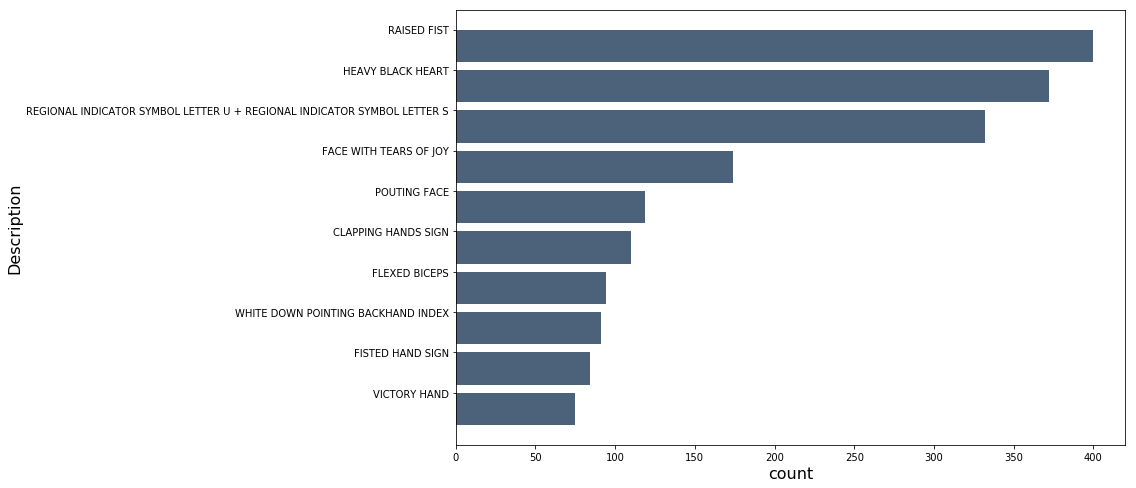

In [8]:
top10.barh(0, 2, width=12, height=8)

### Advanced Visualisation
For those interested in a more advanced Visualisation, here we are going to compare emoji frequency between $2$ subsets of data.

First, we create a matrix of $0$s and $1$s, where `mat`$_{ij}$ represents the presence of the $j^{th}$ emoji in the $i^{th}$ tweet.

In [9]:
# This is the same as the previous creation of count, but without the summing

mat = 1*(Final_Tweets.apply(lambda y : emojis.apply(lambda x : x in y, 'String Representation')\
                               , 'text'))

Now, we define two different subsets of the data, then count the emojis in those subsets based on mat. For example, let’s compare emoji usage between tweets mentioning `#womensmarch` and tweets mentioning `#theresistance`. First, we create the two subsets, count emojis in each subset, and create a combined dataset to facilitate comparisons.

In [10]:
# Which rows correspond to tweets with each hashtag?

womensmarch_rows = Final_Tweets.apply(lambda x : "#womensmarch" in x, 'text')
theresistance_rows = Final_Tweets.apply(lambda x : "#theresistance" in x, 'text')

# Matrix subsets for each hashtag

womensmarch_mat = mat[womensmarch_rows, :]
theresistance_mat = mat[theresistance_rows, :]

# Convert to sums of occurence of each emoji in each subset

emoji_womensmarch = np.apply_along_axis(np.sum, arr = womensmarch_mat, axis = 0)
emoji_theresistance = np.apply_along_axis(np.sum, arr = theresistance_mat, axis = 0)

# Add columns to our emoji dataset corresponding to these values

emojis['#theresistance Density'] = emoji_theresistance
emojis['#womensmarch Density'] = emoji_womensmarch

Now, we need to choose which tweets to consider for our analysis. In the following, we define `thresh` to be the minimum frequency of the tweet in both subsets and `thresh_for_each` is the minimum value for atleast $1$ of the frequencies. In our example we restrict our attention to the top `k` in each dataset, setting `k = 50`, `thresh = 1` and `thresh_for_each = 3`. Feel free to play around with these values.

In [11]:
k = 50
thresh = 1
thresh_for_each = 3

# Subset top k for each category

keep = np.zeros(842)
keep[np.argsort(emojis['#theresistance Density'])[-k:]] = 1
keep[np.argsort(emojis['#womensmarch Density'])[-k:]] = 1

# Subset minimum threshold

keep = np.logical_and(keep, np.logical_and(emojis['#theresistance Density'] >= thresh, \
                                          emojis['#womensmarch Density'] >= thresh))

# Subset the minimum for atleast one subset

keep = np.logical_and(keep, np.logical_or(emojis['#theresistance Density'] >= thresh_for_each, \
                                          emojis['#womensmarch Density'] >= thresh_for_each))

# Make the subset

dataset_to_analyse = emojis.take(np.arange(emojis.num_rows)[keep])

print(dataset_to_analyse.num_rows)

dataset_to_analyse

11


Description,Native,Bytes,String Representation,count,rank,#theresistance Density,#womensmarch Density
FACE WITH TEARS OF JOY,😂,\xF0\x9F\x98\x82,<82>,174,4,3,10
FLEXED BICEPS,💪,\xF0\x9F\x92\xAA,,94,7,3,7
GROWING HEART,💗,\xF0\x9F\x92\x97,<97>,38,23,1,4
HEAVY BLACK HEART,❤,\xE2\x9D\xA4,<9d>,372,2,6,10
PERSON RAISING BOTH HANDS IN CELEBRATION,🙌,\xF0\x9F\x99\x8C,<8c>,59,16,1,7
PERSON WITH FOLDED HANDS,🙏,\xF0\x9F\x99\x8F,<8f>,68,14,1,3
PURPLE HEART,💜,\xF0\x9F\x92\x9C,<9c>,55,18,1,20
RAISED FIST,✊,\xE2\x9C\x8A,<9c><8a>,400,1,10,18
REGIONAL INDICATOR SYMBOL LETTER U + REGIONAL INDICATOR ...,🇺🇸,\xF0\x9F\x87\xBA\xF0\x9F\x87\xB8,,332,3,1,8
SPARKLING HEART,💖,\xF0\x9F\x92\x96,<96>,33,26,1,4


Before proceeding, make sure the number of rows in the final dataset isn't too small (don't want missing information) or too large (don't want irrelevant information). Somewhere between $5-10$ should be fine.

Lastly, we are going to plot the `log odds` ratio of emoji counts in tweets containing `#theresistance` vs those containing `#womensmarch` on the x-axis and the y-axis will contain the overall frequency per $1000$ tweets of each emoji.

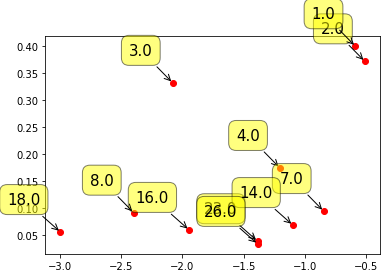

In [34]:
# Computing required values
logOdds = np.log(dataset_to_analyse['#theresistance Density']/dataset_to_analyse['#womensmarch Density'])
Overall_Frequency_per1000 = emojis['count'][keep]/1000

# Plot the points
plt.plot(logOdds, Overall_Frequency_per1000, 'ro')

# Label each point with the overall rank of the emoji

labels = dataset_to_analyse['rank']

for label, x, y in zip(labels, logOdds, Overall_Frequency_per1000):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 25),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round',pad=0.5, fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        fontsize=15)

plt.show()

Note some of the interesting trends here. When the `log odds` ratio is close to $0$, intuitively what should the overall frequency of those emojis be compared to the others? Do emojis to the far left and far right represent emotions you would associate with `#womensmarch` tweets and `#theresistance` tweets respectively?